# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Import dependencies
import requests
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from IPython.display import display
import seaborn as sns
from datetime import datetime
from pytz import timezone

#Import keys
from api_keys import g_key
from api_keys import weather_api_key

# Range of Latitude and Longitude
lat_range = (-90, 90)
lon_range = (-180, 180)


## Generate Cities List

In [11]:
# Do not run

643

In [9]:
# Cities List

lat_lon=[]
cities=[]

# Random set of Latitude and Longitude / size number must be modify according to confirmed cities
lat = np.random.uniform(lat_range[0], lat_range[1], size = 1400)
lon = np.random.uniform(lon_range[0], lon_range[1], size = 1400)
lat_lon = zip(lat,lon)

# Generate the cities list
for lat_lon in lat_lon:
    c = citipy.nearest_city(lat_lon[0],lat_lon[1]).city_name
    if c not in cities:
        cities.append(c)

# Cities count        
len(cities)


621

In [10]:
# Generate and store the cities list in csv file

cities_list =pd.DataFrame({'City': cities})
cities_list.to_csv('Output_Data/cities.csv', index=False, header=True)

cities_list


,City
0,avarua
1,jamestown
2,hermanus
3,cabo san lucas
4,bonthe
...,...
616,sedelnikovo
617,oussouye
618,ploemeur
619,vardo


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Do not run

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

In [11]:
# Weather check for each city

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
not_found = []

# Record count and set count
rec_count = 0
set_count = 1

# Loop to generate data for data frame
for c in cities:
    try:
        response = requests.get(query_url + c).json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print (f'Processing Record {rec_count} of Set {set_count} | City: {c}')
        rec_count = rec_count+1
        if rec_count == 50:
            rec_count = 0
            set_count = set_count+1
    except KeyError:
        print (f'City {c} was not found. Skipping...')
        not_found.append(c)

# Print log        
print ('********************************')
print ('Data Retrieval Complete')
print ('********************************')


Processing Record 0 of Set 1 | City: avarua
Processing Record 1 of Set 1 | City: jamestown
Processing Record 2 of Set 1 | City: hermanus
Processing Record 3 of Set 1 | City: cabo san lucas
Processing Record 4 of Set 1 | City: bonthe
City taolanaro was not found. Skipping...
Processing Record 5 of Set 1 | City: albany
Processing Record 6 of Set 1 | City: atuona
Processing Record 7 of Set 1 | City: ushuaia
Processing Record 8 of Set 1 | City: siderno
Processing Record 9 of Set 1 | City: boden
Processing Record 10 of Set 1 | City: tura
Processing Record 11 of Set 1 | City: mataura
Processing Record 12 of Set 1 | City: wukari
Processing Record 13 of Set 1 | City: rikitea
Processing Record 14 of Set 1 | City: chuy
Processing Record 15 of Set 1 | City: yellowknife
Processing Record 16 of Set 1 | City: inverness
Processing Record 17 of Set 1 | City: padilla
Processing Record 18 of Set 1 | City: juegang
City tsihombe was not found. Skipping...
Processing Record 19 of Set 1 | City: guayaramerin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Do not run

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [29]:
# Cities Data Frame

cities_data_df = pd.DataFrame({'City':city, "Lat":lat, 'Lon':lon, "Max Temp":max_temp, 'Humidity':humidity, 'Cloudiness':cloudiness, 'Wind Speed':wind_speed,
                              'Country':country, 'Date':date})
cities_data_df


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,28.03,78,20,3.09,CK,1621986827
1,Jamestown,42.0970,-79.2353,25.82,57,1,2.57,US,1621986734
2,Hermanus,-34.4187,19.2345,14.39,73,44,3.18,ZA,1621986593
3,Cabo San Lucas,22.8909,-109.9124,31.04,54,66,5.15,MX,1621986812
4,Bonthe,7.5264,-12.5050,26.26,87,99,2.33,SL,1621986756
...,...,...,...,...,...,...,...,...,...
572,Kandalaksha,67.1620,32.4123,2.85,77,55,1.10,RU,1621986970
573,Oussouye,12.4850,-16.5469,24.05,72,93,3.96,SN,1621986970
574,Ploemeur,47.7333,-3.4333,12.20,88,90,8.23,FR,1621986971
575,Vardø,70.3705,31.1107,2.65,71,47,4.37,NO,1621986901


In [30]:
# Find duplicates

duplicates = cities_data_df.loc[cities_data_df.duplicated(subset=['City','Lat'], keep=False),cities_data_df.columns]
duplicates


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [31]:
# Drop duplicates (if any)

# cities_data_df = cities_data_df.drop_duplicates()




In [17]:
# Export city data to csv file
cities_data_df.to_csv('Output_Data/cities_data.csv', index=False, header=True)


In [43]:
# Cities data Statistics
cities_data_df.describe()


,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.950364,17.632179,17.520520,70.736568,56.389948,3.549081,1.621987e+09
std,32.903192,88.586342,8.937223,20.060930,37.354701,2.628320,1.124228e+02
min,-54.800000,-179.166700,-6.110000,5.000000,0.000000,0.000000,1.621986e+09
25%,-4.455300,-59.957000,10.560000,60.000000,20.000000,1.640000,1.621987e+09
50%,24.816700,24.864700,18.670000,75.000000,69.000000,2.870000,1.621987e+09
75%,48.922600,96.128500,25.120000,86.000000,93.000000,4.840000,1.621987e+09
max,78.218600,179.316700,36.330000,100.000000,100.000000,20.300000,1.621987e+09


In [16]:
# Do not run

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
# Remove cities with humidity > 100 %

max_hum = cities_data_df['Humidity'].max()
max_hum


100

In [45]:
if max_hum<=100:
    print("There are no cities with humidity higher than 100 % in this dataset.")
else:
    print(max_hum)


There are no cities with humidity higher than 100 % in this dataset.


In [6]:
# Do not run

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.

# Do not run

Int64Index([], dtype='int64')

In [46]:
#  Get the indices of cities that have humidity over 100%.

print("There are no cities with humidity higher than 100 % in this dataset.")


There are no cities with humidity higher than 100 % in this dataset.


In [19]:
# Do not run

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [72]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

q1 = np.quantile(cities_data_df['Humidity'],0.25)
q2 = np.quantile(cities_data_df['Humidity'],0.50)
q3 = np.quantile(cities_data_df['Humidity'],0.75)
iqr = q3 - q1
lowb = q1 - 1.5*iqr
upb = q3 + 1.5*iqr
outliers = []
count = 0

# Finding the outliers

# outliers = cities_data_df.loc[(cities_data_df < lowb)|(cities_data_df > upb)]

for index, row in cities_data_df.iterrows():
    if row['Humidity']<lowb or row['Humidity']>upb:
        count = count + 1
        outliers.append(row['Humidity'])

print(f'There are {count} outliers in the original dataset')
print(f'Those outliers are: {outliers}')


There are 15 outliers in the original dataset
Those outliers are: [10, 8, 19, 19, 9, 19, 19, 15, 10, 8, 5, 15, 16, 10, 15]


In [73]:
# Clean City Data dataframe

clean_city_data = cities_data_df.drop(cities_data_df[(cities_data_df['Humidity']<lowb) | (cities_data_df['Humidity']>upb)].index, inplace=False)
clean_city_data


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,28.03,78,20,3.09,CK,1621986827
1,Jamestown,42.0970,-79.2353,25.82,57,1,2.57,US,1621986734
2,Hermanus,-34.4187,19.2345,14.39,73,44,3.18,ZA,1621986593
3,Cabo San Lucas,22.8909,-109.9124,31.04,54,66,5.15,MX,1621986812
4,Bonthe,7.5264,-12.5050,26.26,87,99,2.33,SL,1621986756
...,...,...,...,...,...,...,...,...,...
572,Kandalaksha,67.1620,32.4123,2.85,77,55,1.10,RU,1621986970
573,Oussouye,12.4850,-16.5469,24.05,72,93,3.96,SN,1621986970
574,Ploemeur,47.7333,-3.4333,12.20,88,90,8.23,FR,1621986971
575,Vardø,70.3705,31.1107,2.65,71,47,4.37,NO,1621986901


In [75]:
# Export clean city data to csv file

clean_city_data.to_csv('Output_Data/clean_city_data.csv', index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

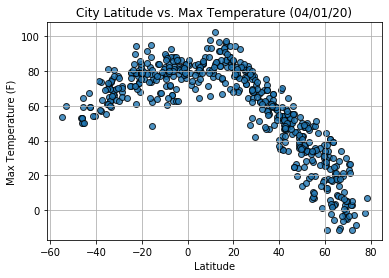

In [10]:
# Do not run

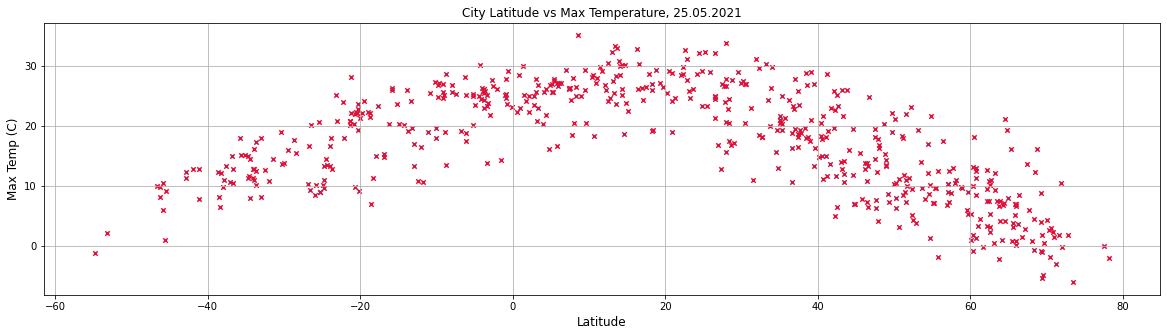

In [90]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Max Temp', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%d.%m.%Y')
plt.title(f'City Latitude vs Max Temperature, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temp (C)', fontsize = 12)
plt.savefig('Images/Latitude_vs_Max_Temp.png')
plt.savefig('Images/Latitude_vs_Max_Temp.jpg')
plt.show()


## Latitude vs. Humidity Plot

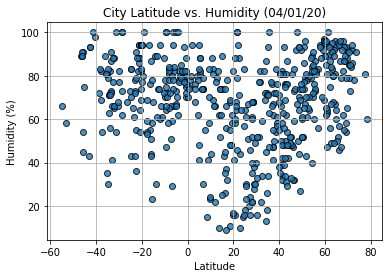

In [11]:
# Do not run

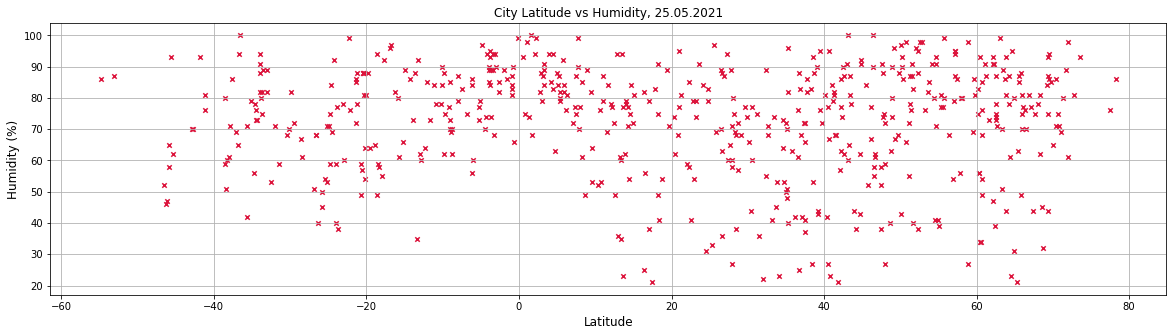

In [91]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Humidity', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%d.%m.%Y')
plt.title(f'City Latitude vs Humidity, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity (%)', fontsize = 12)
plt.savefig('Images/Latitude_vs_Humidity.png')
plt.savefig('Images/Latitude_vs_Humidity.jpg')
plt.show()

## Latitude vs. Cloudiness Plot

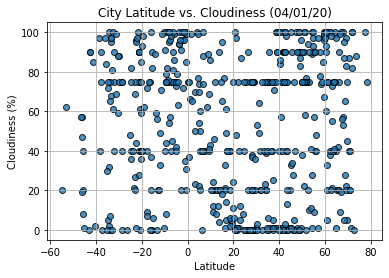

In [12]:
# Do not run

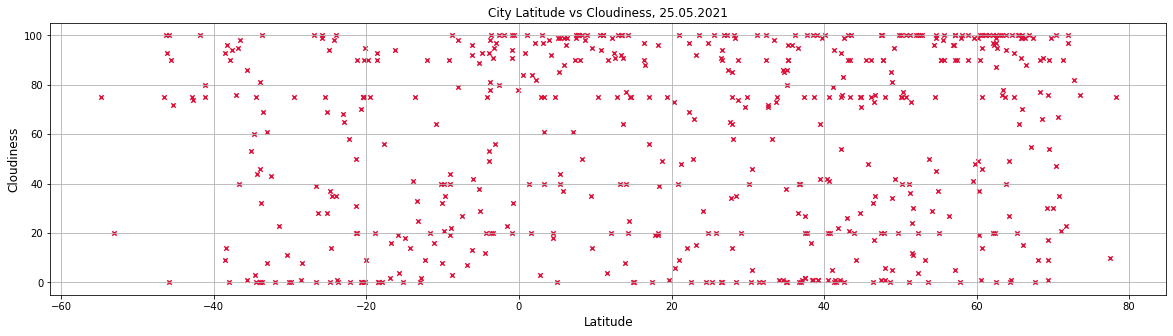

In [92]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Cloudiness', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%d.%m.%Y')
plt.title(f'City Latitude vs Cloudiness, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness', fontsize = 12)
plt.savefig('Images/Latitude_vs_Cloudiness.png')
plt.savefig('Images/Latitude_vs_Cloudiness.jpg')
plt.show()

## Latitude vs. Wind Speed Plot

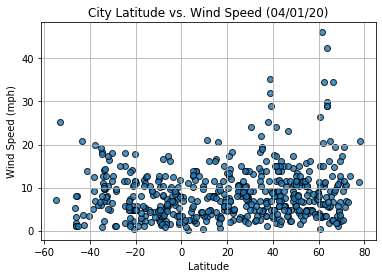

In [13]:
# Do not run

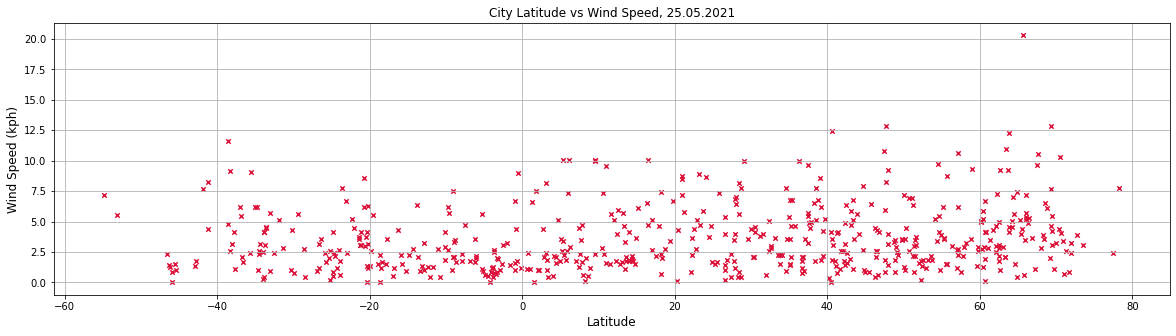

In [95]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Wind Speed', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%d.%m.%Y')
plt.title(f'City Latitude vs Wind Speed, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (kph)', fontsize = 12)
plt.savefig('Images/Latitude_vs_Wind_Speed.png')
plt.savefig('Images/Latitude_vs_Wind_Speed.jpg')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


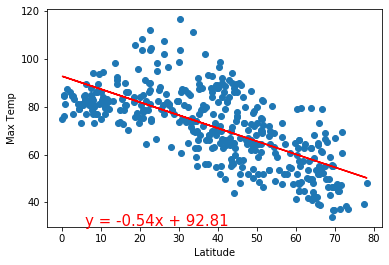

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


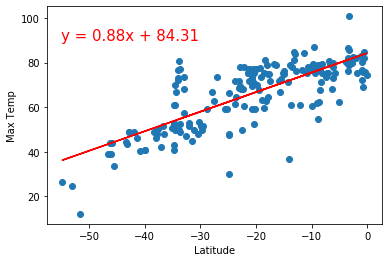

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


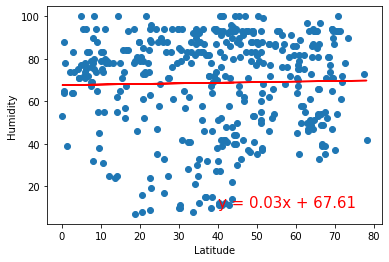

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


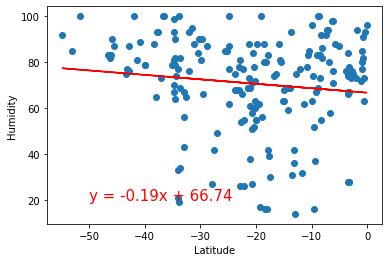

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


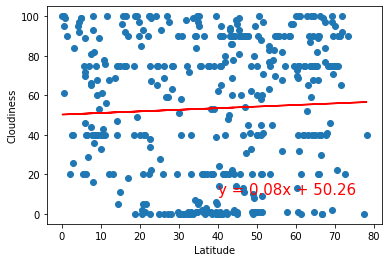

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


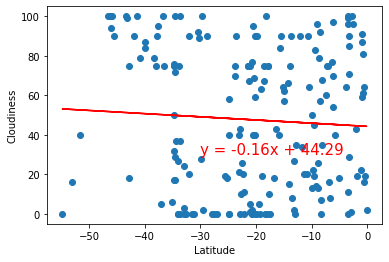

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


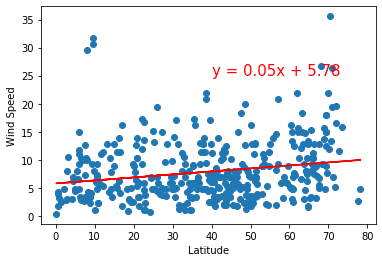

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


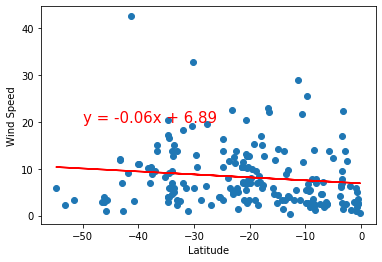